<a href="https://colab.research.google.com/github/micattia/Capstone/blob/master/06_Exprimental_Test_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load pandas component for data science
import pandas as pd

#load Apple data 
linkAP1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleFinalData.csv'
dfAPPL = pd.read_csv(linkAP1)
linkAP2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleNewsStock.csv'
dfAPPLnews = pd.read_csv(linkAP2)

#load Microsoft data
linkMS1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftFinalData.csv'
dfMS = pd.read_csv(linkMS1)
linkMS2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftNewsStock.csv'
dfMSnews = pd.read_csv(linkMS2)

# Changing Some column names for the Microsoft main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfMS = dfMS.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})

# Changing Some column names for the Apple main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfAPPL = dfAPPL.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})


In [0]:
#loading required libraries 
#==========================
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff
%matplotlib inline

plt.style.use('ggplot')

In [0]:
# Building a simple linier regression model and show its generated linier formula
# removed the Close variable from the dataset since it is the same value as the Adj_Close dependant variable
# which will lead to always have 100% accuracy

from statsmodels.formula.api import ols
model = ols('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', data=dfMS)
model = model.fit()
print(model.params)
#print(model)

Intercept   -0.007568
Open        -0.524203
High         0.760597
Low          0.764195
Compound    -0.005027
Neg         -0.018313
Neu         -0.000197
Pos         -0.017996
dtype: float64


In [0]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.886e+05
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:03:02   Log-Likelihood:                 410.96
No. Observations:                2517   AIC:                            -805.9
Df Residuals:                    2509   BIC:                            -759.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0076      0.015     -0.495      0.6

In [0]:
# Using Anova test to compare between the two models where one have the financial data only 
# while the other have the sentiment analysis as well
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model1 = ols('Adj_Close ~ Open + High + Low ', data=dfMS).fit()
model2 = ols('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', data=dfMS).fit()
anova_result = anova_lm(model1, model2)
print(anova_result)

   df_resid         ssr  df_diff  ss_diff         F    Pr(>F)
0    2513.0  106.338547      0.0      NaN       NaN       NaN
1    2509.0  106.314047      4.0   0.0245  0.144548  0.965438


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



In [0]:
################################ 1- SIMPLE LINEAR REGRESSION MODELS ######################################################
################################################################################
# MICROSOFT LINEAR TEST 1
# BUILDING FIRST PREDECTION MODEL - SIMPLE LINIER REGRESSION
# TEST GIVE 100% ACURACY WITH THE CLOSE COLUMN, AS IT IS THE SAME AS ADJ_CLOSE VALUE
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
import statsmodels.api as sm1

train_set, test_set = train_test_split(dfMS, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low + Close + Compound + Neg + Neu + Pos', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.113e+31
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:03:10   Log-Likelihood:                 52172.
No. Observations:                1761   AIC:                        -1.043e+05
Df Residuals:                    1752   BIC:                        -1.043e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.057e-14   2.95e-15     -3.580      0.000   -1.64e-14   -4.78e-15
Open       -3.275e-15   3.69e-15     -0.887      0.375   -1.05e-14    3.96e-15
High        1.277e-15   3.99e-15      0.320      0.749   -6.55e-15    9.11e-15
Low         4.226e-15   3.94e-15      1.073      0.283    -3.5e-15    1.19e-14
Close          1.0000    3.8e-15   2.63e+14      0.000       1.000       1.000
Compound    4.552e-15   3.87e-15      1.175      0.240   -3.04e-15    1.21e-14
Neg         3.209e-14   2.68e-14      1.196      0.232   -2.05e-14    8.47e-14
Neu         -1.18e-15   2.42e-15     -0.488      0.626   -5.92e-15    3.56e-15
Pos        -1.788e-14   2.33e-14     -0.768      0.443   -6.36e-14    2.78e-14
==============================================================================
Omnibus:                      172.856   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.887
Skew:                          -0.879   Prob(JB):                     5.40e-50
Kurtosis:                       2.997   Cond. No.                     2.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low + Close + Compound + Neg + Neu + Pos', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

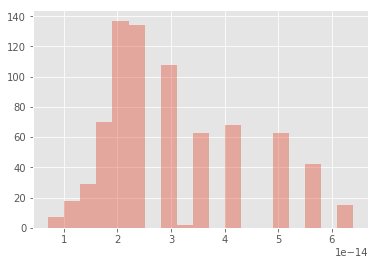

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Calculating the root mean square errors 
# Calculating the percentage of cases with less than 5% error
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 3.295012163886266e-14
PRED(05): 1.0


In [0]:
################################################################################
# MICROSOFT LINEAR TEST 2
# TESTING DIFFRENT PREDECTION - SIMPLE LINIER REGRESSION
# REMOVE CLOSE COLUMN AS IT IS THE SAME VALUE AS ADJ_CLOSE
# TEST SHOWS WHEN REMOVING THE ACCURACY WAS DECREASED 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
#from patsy import dmatrices
#from sklearn.model_selection import train_test_split
#import statsmodels.discrete.discrete_model as sm
#import statsmodels.api as sm1

train_set, test_set = train_test_split(dfMS, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.119e+05
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:03:40   Log-Likelihood:                 277.50
No. Observations:                1761   AIC:                            -539.0
Df Residuals:                    1753   BIC:                            -495.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0217      0.019     -1.168      0.243      -0.058       0.015
Open          -0.5077      0.020    -25.693      0.000      -0.546      -0.469
High           0.7643      0.017     44.469      0.000       0.731       0.798
Low            0.7443      0.017     43.292      0.000       0.711       0.778
Compound      -0.0093      0.024     -0.381      0.703      -0.057       0.038
Neg           -0.1510      0.168     -0.896      0.370      -0.481       0.180
Neu            0.0056      0.015      0.367      0.714      -0.024       0.035
Pos           -0.0086      0.146     -0.059      0.953      -0.295       0.278
==============================================================================
Omnibus:                      220.868   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2353.651
Skew:                          -0.038   Prob(JB):                         0.00
Kurtosis:                       8.663   Cond. No.                     2.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

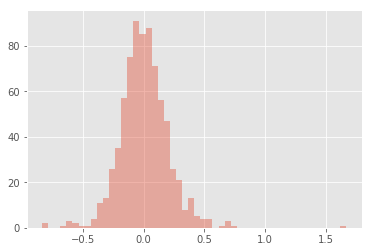

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
# Errors looks to be normaly distributed with few outliers
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Calculating the root mean square errors 
# Calculating the percentage of cases with less than 5% error
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 0.20341252937648835
PRED(05): 0.9986772486772487


In [0]:
# THE SQUARE ERRORS AND PRED ACUARCY WAS BETTER WHEN THE CLOSE VARIABLE WAS THERE
# WHEN REMOVED IT SHOWED MORE SQUARE ERROR AND LESS ACURACY BUT STILL THE ACUARY WAS HIGHT 

In [0]:
################################################################################
# MICROSOFT LINEAR TEST 3
# TESTING DIFFRENT PREDECTION - SIMPLE LINIER REGRESSION
# REMOVE Sentiment analysis columns and see if it was doing better
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
#from patsy import dmatrices
#from sklearn.model_selection import train_test_split
#import statsmodels.discrete.discrete_model as sm
#import statsmodels.api as sm1

train_set, test_set = train_test_split(dfMS, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.430e+06
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:03:59   Log-Likelihood:                 276.72
No. Observations:                1761   AIC:                            -545.4
Df Residuals:                    1757   BIC:                            -523.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0249      0.018     -1.398      0.162      -0.060       0.010
Open          -0.5085      0.020    -25.786      0.000      -0.547      -0.470
High           0.7649      0.017     44.572      0.000       0.731       0.799
Low            0.7444      0.017     43.445      0.000       0.711       0.778
==============================================================================
Omnibus:                      221.182   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2364.276
Skew:                          -0.035   Prob(JB):                         0.00
Kurtosis:                       8.676   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

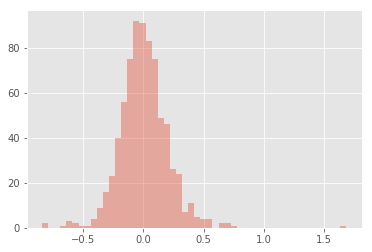

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
# Errors looks to be normaly distributed with few outliers
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Calculating the root mean square errors 
# Calculating the percentage of cases with less than 5% error
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 0.20308116766549456
PRED(05): 0.9986772486772487


In [0]:
# TEST SHOWS THAT ACCURACY WAS NOT CHANGED WHEN REMOVING THE SENTIMENT ANALYSIS COLUMNS

In [0]:
#APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE#
#APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE#
#APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE#
#APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE##APPLE#

In [0]:
# COMPARING A DATA POINT FROM THE APPLE DATASET ON 3 DIFFRENT LINEAR REGRESSION MODELS
# 1- WITH FINANCIAL DATA AND SENTIMENT ANALYSIS
# 2- WITH FINANCIAL DATA AND COMPOUND SENTIMENT ONLY
# 3- ONLY FINANCIAL DATA WITH NO SENTIMENT
# Providing Test Data to the Linear Prediction Model to see its Prediction
from statsmodels.formula.api import ols

model1 = ols('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', data=dfMS).fit()
model2 = ols('Adj_Close ~ Open + High + Low + Compound', data=dfMS).fit()
model3 = ols('Adj_Close ~ Open + High + Low', data=dfMS).fit()

test_df1 = pd.DataFrame(columns=["Open" ,"High","Low","Compound","Neg","Neu","Pos"], data=[[109.72, 110.54, 109.66, 0.7932, 0.052, 0.847, 0.101]])
test_df2 = pd.DataFrame(columns=["Open" ,"High","Low","Compound"], data=[[109.72, 110.54, 109.66, 0.7932]])
test_df3 = pd.DataFrame(columns=["Open" ,"High","Low"], data=[[109.72, 110.54, 109.66]])

mpg_pred1 = model1.predict(test_df1)
mpg_pred2 = model2.predict(test_df2)
mpg_pred3 = model3.predict(test_df3)

print('Original Adj_Close Value:              0    110.06')
print('First Model with sentiment:           ', mpg_pred1,'')
print('Second Model only compound sentiment: ', mpg_pred2)
print('Third Model no sentiment:             ',mpg_pred3)

Original Adj_Close Value:              0    110.06
First Model with sentiment:            0    110.347946
dtype: float64 
Second Model only compound sentiment:  0    110.348667
dtype: float64
Third Model no sentiment:              0    110.352574
dtype: float64


In [0]:
################################################ LINEAR REGRESSION WITH APPLE STOCK ##########################################################################
#######APPLE################APPPLE################APPPLE####################APPLE##########################APPPLE######################APPLE##################
################################################################################
# APPLE LINEAR TEST 1
# TESTING - SIMPLE LINIER REGRESSION
# REMOVE CLOSE COLUMN AS IT IS THE SAME VALUE AS ADJ_CLOSE
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
import statsmodels.api as sm1

train_set, test_set = train_test_split(dfAPPL, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.999e+06
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:31:11   Log-Likelihood:                -906.81
No. Observations:                1761   AIC:                             1830.
Df Residuals:                    1753   BIC:                             1873.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0034      0.038     -0.088      0.930      -0.079       0.072
Open          -0.5892      0.018    -32.305      0.000      -0.625      -0.553
High           0.8292      0.016     52.758      0.000       0.798       0.860
Low            0.7596      0.015     51.289      0.000       0.731       0.789
Compound       0.0348      0.027      1.272      0.204      -0.019       0.088
Neg            0.5412      0.397      1.363      0.173      -0.238       1.320
Neu            0.0259      0.048      0.537      0.591      -0.069       0.121
Pos           -0.4950      0.343     -1.445      0.149      -1.167       0.177
==============================================================================
Omnibus:                      418.972   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10598.347
Skew:                           0.507   Prob(JB):                         0.00
Kurtosis:                      14.976   Cond. No.                     5.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low + Compound + Neg + Neu + Pos', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

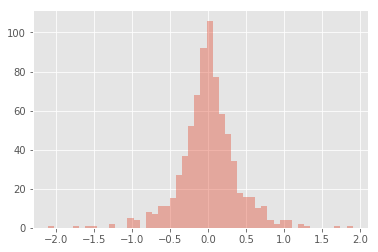

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
# Errors looks to be normaly distributed with few outliers
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Calculating the root mean square errors 
# Calculating the percentage of cases with less than 5% error
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 0.38362762504603054
PRED(05): 0.9986772486772487


In [0]:
################################################################################
# APPLE LINEAR TEST 2
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# REMOVE Sentiment analysis columns and see if it was doing better
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
################################################################################
#from patsy import dmatrices
#from sklearn.model_selection import train_test_split
#import statsmodels.discrete.discrete_model as sm
#import statsmodels.api as sm1

train_set, test_set = train_test_split(dfAPPL, train_size=0.7, random_state=1)

y_train, X_train = dmatrices('Adj_Close ~ Open + High + Low', train_set, return_type = 'dataframe')
linier = sm1.OLS(y_train , X_train)
linreg = linier.fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.668e+06
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:26:52   Log-Likelihood:                -908.33
No. Observations:                1761   AIC:                             1825.
Df Residuals:                    1757   BIC:                             1847.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0170      0.019      0.885      0.376      -0.021       0.055
Open          -0.5889      0.018    -32.303      0.000      -0.625      -0.553
High           0.8301      0.016     52.927      0.000       0.799       0.861
Low            0.7584      0.015     51.344      0.000       0.729       0.787
==============================================================================
Omnibus:                      421.673   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10587.830
Skew:                           0.518   Prob(JB):                         0.00
Kurtosis:                      14.968   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# PREDECTING THE TEST SET BASED ON THE SIMPLE LINEAR REGRESSION MODEL CREATED BY THE TRAINING SET 
y_test, X_test = dmatrices('Adj_Close ~ Open + High + Low', test_set, return_type = 'dataframe')
pred = linreg.predict(X_test)
#pred = model.get_prediction(test_df)

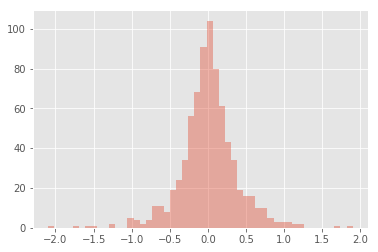

In [0]:
# EVALUATING THE MODEL
# AND PLOT THE ERRORS
# Errors looks to be normaly distributed with few outliers
errors = pred - test_set['Adj_Close']
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Calculating the root mean square errors 
# Calculating the percentage of cases with less than 5% error
import math
rmse = math.sqrt((errors **2).sum()/len(test_set))
rel_change = errors.abs() / test_set['Adj_Close']
pred05 = (rel_change < 0.05).sum() / len(test_set)
print("RMSE:", rmse)
print("PRED(05):", pred05)

RMSE: 0.38314398866699784
PRED(05): 0.9986772486772487


In [0]:
#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#
#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#
#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#
#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#
#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#KNN REGRESSION#

In [0]:
################################# K NEAREST NEIGHBOR REGRESSION MODEL #######################################
################################################################################
# TEST 1
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# TEST WITH BOTH FINANCIAL DATA AND Sentiment analysis columns 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
# USED K = 7
################################################################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

dfMS1 = dfMS.drop('Date', axis=1)

train_set, test_set = train_test_split(dfMS1, train_size=0.7, random_state=1)

x_train = train_set.drop('Adj_Close', axis=1)
y_train = train_set['Adj_Close']

x_test = test_set.drop('Adj_Close', axis = 1)
y_test = test_set['Adj_Close']

##########################################3
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

#x_train_scaled = scaler.fit_transform(x_train)
#x_train = pd.DataFrame(x_train_scaled)

#x_test_scaled = scaler.fit_transform(x_test)
#x_test = pd.DataFrame(x_test_scaled)

###########################################
  
model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 7' , 'is:', error)

RMSE value for k= 7 is: 0.17939743201490005


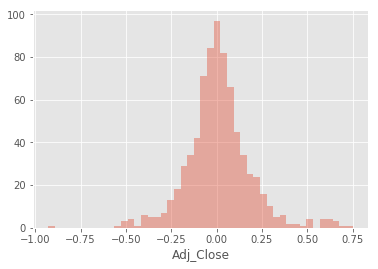

In [0]:
errors = pred - y_test
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Providing Test Data to the KNN Prediction Model to see its Prediction
test_df = pd.DataFrame(columns=["Open" ,"High","Low","Close","Compound","Neg","Neu","Pos"], data=[[28.82, 29.4, 28.8, 29.4, 0, 0,0,0]])
mpg_pred = model.predict(test_df)
mpg_pred


array([29.28857143])

In [0]:
################################# K NEAREST NEIGHBOR REGRESSION MODEL #######################################
################################################################################
# TEST 2
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# Removed Close Variable and TEST WITH BOTH FINANCIAL DATA AND Sentiment analysis columns 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
# USED K = 7
################################################################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

dfMS1 = dfMS.drop('Date', axis=1)
dfMS1 = dfMS1.drop('Close', axis=1)
train_set, test_set = train_test_split(dfMS1, train_size=0.7, random_state=1)

x_train = train_set.drop('Adj_Close', axis=1)
y_train = train_set['Adj_Close']

x_test = test_set.drop('Adj_Close', axis = 1)
y_test = test_set['Adj_Close']

##########################################3
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

#x_train_scaled = scaler.fit_transform(x_train)
#x_train = pd.DataFrame(x_train_scaled)

#x_test_scaled = scaler.fit_transform(x_test)
#x_test = pd.DataFrame(x_test_scaled)

###########################################
  
model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 7' , 'is:', error)

RMSE value for k= 7 is: 0.2928785088900476


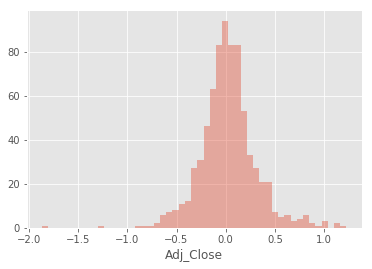

In [0]:
#errors = pred - test_set['Adj_Close']
errors = pred - y_test
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# Providing Test Data to the KNN Prediction Model to see its Prediction
test_df = pd.DataFrame(columns=["Open" ,"High","Low","Compound","Neg","Neu","Pos"], data=[[28.82, 29.4, 28.8, 0, 0,0,0]])
mpg_pred = model.predict(test_df)
mpg_pred


array([29.14714286])

In [0]:
# FOUND THAT WHEN REMOVING THE CLOSE COLUMN THE ACCURACY OF PREDECTION WAS DECREASED AND THE RMSE VALUE WAS INCREASED 

In [0]:
def normalize(x):   
  return (x - min(x)) / (max(x) - min(x)) ;



In [0]:
#df[phone_col_name] = df.apply(clean_up, axis=1)
normMS = dfMS[["Open" ,"High","Low", "Adj_Close"]]
normMS = normMS.apply(normalize)
sentMS = dfMS[["Compound","Neg","Neu","Pos"]]
normMS = pd.concat([normMS,sentMS], axis=1, sort=False)
#normMS.head


In [0]:
################################# K NEAREST NEIGHBOR REGRESSION MODEL #######################################
################################################################################
# TEST 3
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# After Normalizing the data and Removeing Close Variable 
# and TEST WITH BOTH FINANCIAL DATA AND Sentiment analysis columns 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
# USED K = 7
################################################################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

train_set, test_set = train_test_split(normMS, train_size=0.7, random_state=1)

x_train = train_set.drop('Adj_Close', axis=1)
y_train = train_set['Adj_Close']

x_test = test_set.drop('Adj_Close', axis = 1)
y_test = test_set['Adj_Close']

model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 7' , 'is:', error)

RMSE value for k= 7 is: 0.01421265378866703


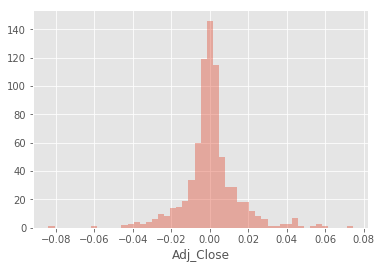

In [0]:
#errors = pred - test_set['Adj_Close']
errors = pred - y_test
sns.distplot(errors,kde = False)
plt.show()

In [0]:
################################# K NEAREST NEIGHBOR REGRESSION MODEL #######################################
################################################################################
# TEST 4
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# After Normalizing the data and Removeing Close and Sentiment variables
# and TEST WITH BOTH FINANCIAL DATA AND Sentiment analysis columns 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
# USED K = 7
################################################################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
##########################################
normMS = dfMS[["Open" ,"High","Low", "Adj_Close"]]
normMS = normMS.apply(normalize)
##########################################

train_set, test_set = train_test_split(normMS, train_size=0.7, random_state=1)

x_train = train_set.drop('Adj_Close', axis=1)
y_train = train_set['Adj_Close']

x_test = test_set.drop('Adj_Close', axis = 1)
y_test = test_set['Adj_Close']

model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 7' , 'is:', error)

RMSE value for k= 7 is: 0.00578682882831184


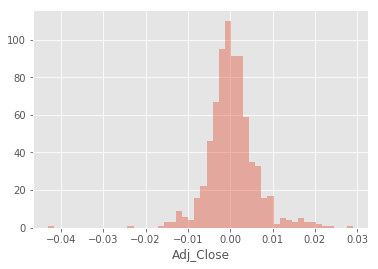

In [0]:
#errors = pred - test_set['Adj_Close']
errors = pred - y_test
sns.distplot(errors,kde = False)
plt.show()

In [0]:
# CONCLOSION MICROSOFT:
# RMSE is a good measure of how accurately the model predicts the response
# Lower values of RMSE indicate better fit. 

# WHEN NORMALIZING THE FINANCIAL DATA THE ROOT MEAN SQUARE ERROR 
# VALUE WAS DECREASED SIGNIFICANTLY 
# IT WAS EVEN BETTER THAN WHEN THE CLOSE COLUMN WAS THERE 
# BUT THE DATA WAS NOT NORMALIZED
# Test 4 NORMALIZED WITHOUT CLOSE AND SENTIMENT COLUMNS RMSE = 0.00578682882831184
# TEST 3 NORMALIZED WITHOUT CLOSE COLUMN RMSE = 0.01421265378866703
# TEST 2 BEFORE NORMALIZATION AND CLOSE WAS REMOVED RMSE = 0.2928785088900476
# TEST 1 BEFORE NORMALIZATION AND CLOSE COLUMN WAS THERE RMSE = 0.17939743201490005
# ALSO IT SHOWS THAT THE SENTIMENT ANALYSIS COLUMN DID NOT MAKE A DIFFERENCE
# IT EVEN SHOWS A BETTER ACURACY WHEN WAS REMOVED


In [0]:
######### APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###
### APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###
### APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###APPLE KNN ###

In [0]:
def normalize(x):   
  return (x - min(x)) / (max(x) - min(x)) ;

#df[phone_col_name] = df.apply(clean_up, axis=1)
normAP = dfAPPL[["Open" ,"High","Low", "Adj_Close"]]
normAP = normAP.apply(normalize)
sentAP = dfAPPL[["Compound","Neg","Neu","Pos"]]
normAP = pd.concat([normAP,sentAP], axis=1, sort=False)
#normMS.head


In [4]:
################################# K NEAREST NEIGHBOR REGRESSION MODEL #######################################
############################## APPLE KNN ########################################
# TEST 1
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# After Normalizing the data and Removeing Close Variable 
# and TEST WITH BOTH FINANCIAL DATA AND Sentiment analysis columns 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
# USED K = 7
################################################################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

train_set, test_set = train_test_split(normAP, train_size=0.7, random_state=1)

x_train = train_set.drop('Adj_Close', axis=1)
y_train = train_set['Adj_Close']

x_test = test_set.drop('Adj_Close', axis = 1)
y_test = test_set['Adj_Close']

model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 7' , 'is:', error)

RMSE value for k= 7 is: 0.011502125122544471


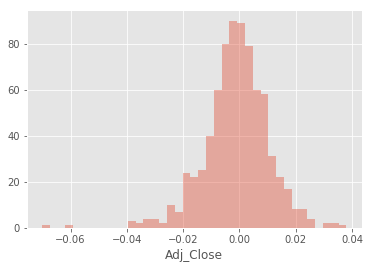

In [5]:
#errors = pred - test_set['Adj_Close']
errors = pred - y_test
sns.distplot(errors,kde = False)
plt.show()

In [6]:
################################# K NEAREST NEIGHBOR REGRESSION MODEL #######################################
############################## APPLE KNN ########################################
# TEST 2
# TESTING DIFFRENT PREDECTION - KNN REGRESSION
# After Normalizing the data and Removeing Close AND Sentiment Variables
# and TEST WITH BOTH FINANCIAL DATA AND Sentiment analysis columns 
# SPLITING THE DATA INTO TRAINING SET AND TEST SET
# THEN BUILDONG THE MODEL BASED ON THE TRAINING SET
# USED K = 7
################################################################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
#####################################
normAP = dfAPPL[["Open" ,"High","Low", "Adj_Close"]]
normAP = normAP.apply(normalize)
#####################################

train_set, test_set = train_test_split(normAP, train_size=0.7, random_state=1)

x_train = train_set.drop('Adj_Close', axis=1)
y_train = train_set['Adj_Close']

x_test = test_set.drop('Adj_Close', axis = 1)
y_test = test_set['Adj_Close']

model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= 7' , 'is:', error)

RMSE value for k= 7 is: 0.004450694048585692


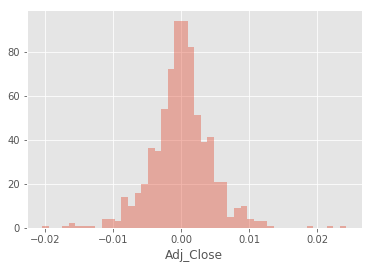

In [7]:
#errors = pred - test_set['Adj_Close']
errors = pred - y_test
sns.distplot(errors,kde = False)
plt.show()

In [0]:
#Linear Regression
#MS test 1 --> with close column
#RMSE: 3.295012163886266e-14
#
#MS test 2 --> removed Close column
#RMSE: 0.20341252937648835
#
#MS Test 3 --> Removed Sentiment
#RMSE: 0.20308116766549456
#-----------
#Apple test 1 --> without close column
#RMSE: 0.38362762504603054
#
#Apple test 2 --> without sentiment
#RMSE: 0.38314398866699784
#=======================================
#KNN REGRESSION 
#################################
#MS Test 1--> all columns incloding close
#RMSE value for k= 7 is: 0.17939743201490005
#
#MS test 2 --> removed close column
#RMSE value for k= 7 is: 0.2928785088900476
#
#MS test 3 --> All columns except close After NORMALIZATION
#RMSE value for k= 7 is: 0.01421265378866703
#
#MS test 4 --> After Normalizing and Removeing Close and Sentiment variables
#RMSE value for k= 7 is: 0.00578682882831184
#
#AP test 1 --> All columns except close After NORMALIZATION
#RMSE value for k= 7 is: 0.011502125122544471
#
#AP test 2 --> After Normalizing and Removeing Close and Sentiment variables
#RMSE value for k= 7 is: 0.004450694048585692